# Preprocessing

In [24]:
import re
import nltk
import string

import pandas as pd
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [8]:
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#Read data
train_df = pd.read_csv('train.csv')
#Lowercase
train_df['comment_text'] = train_df['comment_text'].astype(str).str.lower()
#Replacing \n wwith ' '
train_df['comment_text'] = train_df['comment_text'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)
train_df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [11]:
#Puntuation remove
def cleaning_punctuations(text):
    english_punctuations = string.punctuation
    punctuations_list = english_punctuations
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: cleaning_punctuations(x))
train_df['comment_text'].tail()

159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, dtype: object

In [12]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: cleaning_repeating_char(x))
train_df['comment_text'].tail()

159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, dtype: object

In [13]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: cleaning_numbers(x))
train_df['comment_text'].tail()

159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, dtype: object

In [14]:
#Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: cleaning_URLs(x))
train_df['comment_text'].tail()

159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, dtype: object

In [15]:
#replace each non-letter with empty string
train_df['comment_text'].str.replace('[^a-zA-Z]', '')
train_df['comment_text']

<ipython-input-15-58b67d087e03>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'].str.replace('[^a-zA-Z]', '')


0         explanation why the edits made under my userna...
1         d aww he matches this background colour i am s...
2         hey man i am really not trying to edit war it ...
3         more i cannot make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [16]:
#Tokenizer
tokeniser = RegexpTokenizer(r'\w+')
train_df['text_token'] = train_df['comment_text'].apply(tokeniser.tokenize)
train_df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_token
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,"[explanation, why, the, edits, made, under, my..."
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,"[d, aww, he, matches, this, background, colour..."
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,"[hey, man, i, am, really, not, trying, to, edi..."


In [17]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list of stopwords
my_stopwords = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'article', 'page', 'wikipedia']
stopwords.extend(my_stopwords)

# Remove stopwords
train_df['text_token'] = train_df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
train_df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_token
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,"[aww, matches, background, colour, seemingly, ..."
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,"[hey, man, really, trying, edit, war, guy, con..."


In [18]:
#Applying Stemming
st = SnowballStemmer(language='english')
train_df['text_token'] = train_df['text_token'].apply(lambda x: [st.stem(y) for y in x])
train_df['text_token'].head()

0    [explan, edit, made, usernam, hardcor, metalli...
1    [aww, match, background, colour, seem, stuck, ...
2    [hey, man, realli, tri, edit, war, guy, consta...
3    [cannot, make, real, suggest, improv, wonder, ...
4                           [sir, hero, chanc, rememb]
Name: text_token, dtype: object

In [19]:
#Applying Lemmatizer
lm = WordNetLemmatizer()
train_df['text_token'] = train_df['text_token'].apply(lambda x: [lm.lemmatize(y) for y in x])
train_df['text_token'].head()

0    [explan, edit, made, usernam, hardcor, metalli...
1    [aww, match, background, colour, seem, stuck, ...
2    [hey, man, realli, tri, edit, war, guy, consta...
3    [cannot, make, real, suggest, improv, wonder, ...
4                           [sir, hero, chanc, rememb]
Name: text_token, dtype: object

In [20]:
#Remove infrequent word, remove words which occur less then two times.
train_df['comment_text'] = train_df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
train_df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_token
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,"[explan, edit, made, usernam, hardcor, metalli..."
1,000103f0d9cfb60f,aww match background colour seem stuck thank t...,0,0,0,0,0,0,"[aww, match, background, colour, seem, stuck, ..."
2,000113f07ec002fd,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0,"[hey, man, realli, tri, edit, war, guy, consta..."


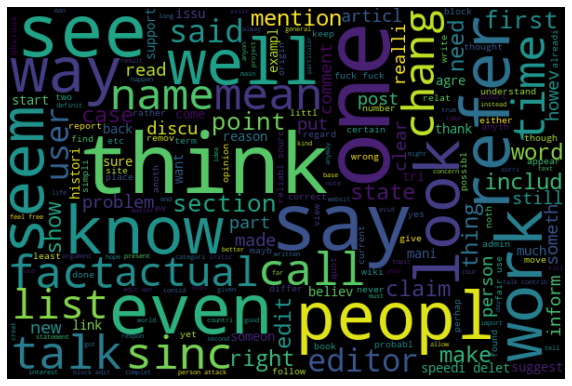

In [23]:
#Print a word cloud to see most important words
all_words = ' '.join([word for word in train_df['comment_text']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

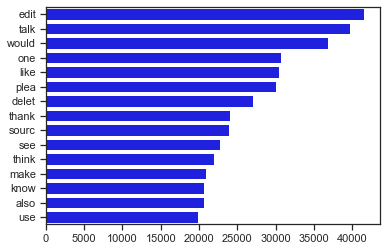

In [27]:
#Get frequency of every word
all_words = ' '.join([word for word in train_df['comment_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

# Obtain top 10 words
top_10 = fd.most_common(15)

# Bar plot of most frequen words
fdist = pd.Series(dict(top_10))

sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [28]:
#Creating a column to simplify tarjet to a binary no multilabel
train_df['is_toxic'] = 1
train_df.loc[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1),'is_toxic'] = 0

<AxesSubplot:>

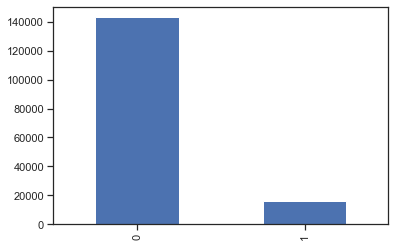

In [31]:
#Plot to see the imbalance betwen toxic and non toxic 
train_df.is_toxic.value_counts().plot.bar()

In [81]:
#export preprocessed databased
train_df.to_csv('processed_data.csv')#Edit this line depending enviroment